In [4]:
import torch
from torch import embedding, nn
import torch.nn.functional as F
import torch.optim as optim
import random
import time
from torch import nn
from tqdm import tqdm
from unet import UNet
from discriminator import Discriminator
from baseline import FaceRecognizer
from preprocessing import *
from preprocessing_GAN import *

In [5]:
train_data.shape

torch.Size([280, 1, 1, 64, 64])

In [6]:
import torch_dct as dct

In [7]:
for i in range(train_data.shape[0]):
    train_data[i] = dct.idct(train_data[i])

In [8]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [9]:
d, l = discriminator_make_dataset()

In [10]:
def train_discriminator(model, data, targets, optimizer, criterion):  
    model.train()
    epoch_loss = 0
    sampling = list(range(data.shape[0]))
    random.shuffle(sampling)
    print("training ...")
    for i, selected_batch_index in tqdm(enumerate(sampling)):
        optimizer.zero_grad()
        z = model.forward(data[selected_batch_index])
        loss=criterion(z,targets[selected_batch_index].long())
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    return epoch_loss

In [11]:
training_losses = []
def train_discriminator_eps(model, eps, lr, reg, train_data, train_target):
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=reg, nesterov=False)
    criterion = nn.CrossEntropyLoss(reduction = 'sum')
    best_train_loss = 999999
    for epoch in range(eps):  
        print("epoch start: ", epoch)  
        start_time = time.time()
        training_loss = train_discriminator(model, train_data, train_target, optimizer, criterion)
        training_losses.append(training_loss)  
        end_time = time.time()
        epoch_mins, epoch_secs = epoch_time(start_time, end_time)
        torch.save(model.state_dict(), 'best_model_discriminator.pt')
        print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s', end='')
        print(f'\tTrain Loss: {training_loss:.3f}')

In [12]:
train_discriminator_eps(discriminator, 20, 0.001, 0.00001, d, l)

10it [00:00, 94.67it/s]

epoch start:  0
training ...


400it [00:02, 157.99it/s]
17it [00:00, 165.33it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 115.814
epoch start:  1
training ...


400it [00:02, 166.86it/s]
17it [00:00, 168.09it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 5.894
epoch start:  2
training ...


400it [00:02, 158.27it/s]
18it [00:00, 171.08it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 1.017
epoch start:  3
training ...


400it [00:02, 161.91it/s]
16it [00:00, 151.71it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.481
epoch start:  4
training ...


400it [00:02, 170.84it/s]
16it [00:00, 150.66it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.303
epoch start:  5
training ...


400it [00:02, 159.92it/s]
18it [00:00, 174.77it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.217
epoch start:  6
training ...


400it [00:02, 162.10it/s]
16it [00:00, 157.69it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.165
epoch start:  7
training ...


400it [00:02, 164.31it/s]
16it [00:00, 158.20it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.133
epoch start:  8
training ...


400it [00:02, 164.65it/s]
15it [00:00, 146.47it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.110
epoch start:  9
training ...


400it [00:02, 158.91it/s]
16it [00:00, 154.67it/s]

Epoch: 10 | Time: 0m 2s	Train Loss: 0.093
epoch start:  10
training ...


400it [00:02, 163.72it/s]
15it [00:00, 145.60it/s]

Epoch: 11 | Time: 0m 2s	Train Loss: 0.081
epoch start:  11
training ...


400it [00:02, 168.08it/s]
16it [00:00, 157.01it/s]

Epoch: 12 | Time: 0m 2s	Train Loss: 0.071
epoch start:  12
training ...


400it [00:02, 160.06it/s]
18it [00:00, 178.04it/s]

Epoch: 13 | Time: 0m 2s	Train Loss: 0.063
epoch start:  13
training ...


400it [00:02, 161.89it/s]
15it [00:00, 141.17it/s]

Epoch: 14 | Time: 0m 2s	Train Loss: 0.057
epoch start:  14
training ...


400it [00:02, 158.60it/s]
16it [00:00, 158.30it/s]

Epoch: 15 | Time: 0m 2s	Train Loss: 0.051
epoch start:  15
training ...


400it [00:02, 146.89it/s]
17it [00:00, 163.24it/s]

Epoch: 16 | Time: 0m 2s	Train Loss: 0.047
epoch start:  16
training ...


400it [00:02, 156.22it/s]
16it [00:00, 155.26it/s]

Epoch: 17 | Time: 0m 2s	Train Loss: 0.043
epoch start:  17
training ...


400it [00:02, 144.14it/s]
15it [00:00, 149.38it/s]

Epoch: 18 | Time: 0m 2s	Train Loss: 0.040
epoch start:  18
training ...


400it [00:02, 152.56it/s]
16it [00:00, 155.36it/s]

Epoch: 19 | Time: 0m 2s	Train Loss: 0.037
epoch start:  19
training ...


400it [00:02, 146.97it/s]

Epoch: 20 | Time: 0m 2s	Train Loss: 0.035


In [14]:
torch.softmax(discriminator(d[3]),-1)

tensor([[5.8449e-04, 9.9942e-01]], grad_fn=<SoftmaxBackward0>)

In [15]:
def evolve_generator_1ep(generator, faceRecognizer, discriminator, attack_targets, optimizer, criterion, alpha):
    gan_input = torch.normal(0, 1, size=(1,1,64, 64)) # noise
    faceRecognizer.eval()
    discriminator.eval()
    generator.train()
    optimizer.zero_grad()
    generated_imgs = generator.forward(gan_input)
    loss = 0
    for i in range(attack_targets.shape[0]):
        z1 = faceRecognizer.forward(generated_imgs[0][i].reshape(1,1,64,64))
        loss+=criterion(z1,attack_targets[i])
        z2 = discriminator.forward(generated_imgs[0][i].reshape(1,1,64,64))
        loss+= alpha*criterion(z2,torch.tensor([1]))
    loss.backward()
    optimizer.step()
    epoch_loss = loss.item()/len(attack_targets) 
    return epoch_loss
    

In [16]:
def evolve_generator(eps, lr, reg, lr_decay, alpha):
    for epoch in range(eps): 
        optimizer = optim.SGD(generator.parameters(), lr=lr*lr_decay**epoch, momentum=0.9, weight_decay=reg, nesterov=False)
        criterion = nn.CrossEntropyLoss(reduction = 'sum')
        epoch_loss = 0
        epoch_loss += evolve_generator_1ep(generator, faceRecognizer, discriminator, attack_targets, optimizer, criterion, alpha)
        print("loss(generator): ", epoch_loss)



In [13]:
evolve_generator(10, 0.001, 0.0002, 0.98, 1)

loss(generator):  22.553071594238283
loss(generator):  17.264419555664062
loss(generator):  14.379428100585937
loss(generator):  13.22655792236328
loss(generator):  11.791796112060547
loss(generator):  10.302708435058594
loss(generator):  8.719108581542969
loss(generator):  7.595701599121094
loss(generator):  6.908092498779297
loss(generator):  6.59422607421875


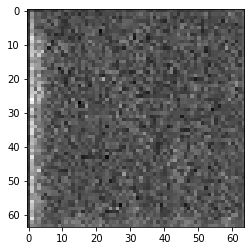

In [14]:
generated_image(1)

In [15]:
print_confidence(9)

tensor([[0.0266, 0.0256, 0.0254, 0.0245, 0.0228, 0.0255, 0.0272, 0.0252, 0.0237,
         0.0248, 0.0248, 0.0250, 0.0265, 0.0256, 0.0239, 0.0254, 0.0266, 0.0237,
         0.0237, 0.0249, 0.0239, 0.0246, 0.0241, 0.0274, 0.0249, 0.0235, 0.0270,
         0.0248, 0.0232, 0.0231, 0.0246, 0.0249, 0.0238, 0.0278, 0.0251, 0.0265,
         0.0268, 0.0244, 0.0247, 0.0237]], grad_fn=<SoftmaxBackward0>)


In [16]:
torch.softmax(discriminator.forward(generate(1).reshape(1,1,64,64)),-1)

tensor([[0.9721, 0.0279]], grad_fn=<SoftmaxBackward0>)

In [17]:
d, l = discriminator_make_dataset()

In [18]:
train_discriminator_eps(discriminator, 20, 0.001, 0.00001, d, l)

16it [00:00, 155.17it/s]

epoch start:  0
training ...


400it [00:02, 157.00it/s]
16it [00:00, 150.01it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 20.138
epoch start:  1
training ...


400it [00:02, 155.09it/s]
16it [00:00, 156.37it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.228
epoch start:  2
training ...


400it [00:02, 147.46it/s]
15it [00:00, 140.14it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.128
epoch start:  3
training ...


400it [00:02, 158.94it/s]
20it [00:00, 194.44it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.082
epoch start:  4
training ...


400it [00:02, 161.93it/s]
14it [00:00, 132.09it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.063
epoch start:  5
training ...


400it [00:02, 143.92it/s]
16it [00:00, 149.26it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.051
epoch start:  6
training ...


400it [00:02, 164.73it/s]
15it [00:00, 148.73it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.043
epoch start:  7
training ...


400it [00:02, 144.65it/s]
16it [00:00, 155.93it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.037
epoch start:  8
training ...


400it [00:02, 153.38it/s]
15it [00:00, 147.02it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.032
epoch start:  9
training ...


400it [00:01, 212.51it/s]
25it [00:00, 238.39it/s]

Epoch: 10 | Time: 0m 1s	Train Loss: 0.029
epoch start:  10
training ...


400it [00:01, 239.07it/s]
26it [00:00, 256.69it/s]

Epoch: 11 | Time: 0m 1s	Train Loss: 0.026
epoch start:  11
training ...


400it [00:01, 236.31it/s]
19it [00:00, 185.44it/s]

Epoch: 12 | Time: 0m 1s	Train Loss: 0.023
epoch start:  12
training ...


400it [00:01, 207.19it/s]
16it [00:00, 153.54it/s]

Epoch: 13 | Time: 0m 1s	Train Loss: 0.021
epoch start:  13
training ...


400it [00:02, 149.04it/s]
15it [00:00, 143.84it/s]

Epoch: 14 | Time: 0m 2s	Train Loss: 0.020
epoch start:  14
training ...


400it [00:02, 142.73it/s]
15it [00:00, 148.29it/s]

Epoch: 15 | Time: 0m 2s	Train Loss: 0.018
epoch start:  15
training ...


400it [00:02, 144.00it/s]
15it [00:00, 149.81it/s]

Epoch: 16 | Time: 0m 2s	Train Loss: 0.017
epoch start:  16
training ...


400it [00:02, 149.73it/s]
18it [00:00, 174.45it/s]

Epoch: 17 | Time: 0m 2s	Train Loss: 0.016
epoch start:  17
training ...


400it [00:02, 157.88it/s]
18it [00:00, 178.13it/s]

Epoch: 18 | Time: 0m 2s	Train Loss: 0.015
epoch start:  18
training ...


400it [00:02, 152.12it/s]
17it [00:00, 165.42it/s]

Epoch: 19 | Time: 0m 2s	Train Loss: 0.014
epoch start:  19
training ...


400it [00:02, 150.41it/s]

Epoch: 20 | Time: 0m 2s	Train Loss: 0.013


In [19]:
torch.softmax(discriminator.forward(generate(1).reshape(1,1,64,64)),-1)

tensor([[9.9993e-01, 7.3036e-05]], grad_fn=<SoftmaxBackward0>)

In [18]:
for i in range(10):
    evolve_generator(100, 0.001, 0.0002, 0.99, 1)
    d, l = discriminator_make_dataset()
    train_discriminator_eps(discriminator, 20, 0.001, 0.00001, d, l)

loss(generator):  22.88921356201172
loss(generator):  4.080525207519531
loss(generator):  3.8227565765380858
loss(generator):  3.6839542388916016
loss(generator):  3.7876960754394533
loss(generator):  3.777068328857422
loss(generator):  3.6604278564453123
loss(generator):  3.671075439453125
loss(generator):  3.672930908203125
loss(generator):  3.673936462402344
loss(generator):  3.6745021820068358
loss(generator):  3.7017490386962892
loss(generator):  3.67675895690918
loss(generator):  3.6751548767089846
loss(generator):  3.6742191314697266
loss(generator):  3.6732112884521486
loss(generator):  3.6694366455078127
loss(generator):  3.658894729614258
loss(generator):  3.6803733825683596
loss(generator):  3.6680797576904296
loss(generator):  3.6975681304931642
loss(generator):  3.666181182861328
loss(generator):  3.6583175659179688
loss(generator):  3.664295959472656
loss(generator):  3.662492370605469
loss(generator):  3.6645587921142577
loss(generator):  3.650502395629883
loss(generator

16it [00:00, 155.64it/s]

epoch start:  0
training ...


400it [00:02, 163.51it/s]
17it [00:00, 157.81it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 141.268
epoch start:  1
training ...


400it [00:02, 163.39it/s]
17it [00:00, 169.83it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 4.836
epoch start:  2
training ...


400it [00:02, 169.04it/s]
17it [00:00, 163.57it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 1.395
epoch start:  3
training ...


400it [00:02, 173.15it/s]
19it [00:00, 186.89it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.749
epoch start:  4
training ...


400it [00:02, 171.65it/s]
18it [00:00, 172.75it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.473
epoch start:  5
training ...


400it [00:02, 155.96it/s]
17it [00:00, 160.92it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.336
epoch start:  6
training ...


400it [00:02, 161.65it/s]
17it [00:00, 169.30it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.255
epoch start:  7
training ...


400it [00:02, 159.68it/s]
18it [00:00, 169.05it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.206
epoch start:  8
training ...


400it [00:02, 160.29it/s]
18it [00:00, 176.59it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.169
epoch start:  9
training ...


400it [00:01, 217.58it/s]
23it [00:00, 224.21it/s]

Epoch: 10 | Time: 0m 1s	Train Loss: 0.142
epoch start:  10
training ...


400it [00:02, 198.24it/s]
18it [00:00, 170.07it/s]

Epoch: 11 | Time: 0m 2s	Train Loss: 0.122
epoch start:  11
training ...


400it [00:02, 168.00it/s]
16it [00:00, 159.12it/s]

Epoch: 12 | Time: 0m 2s	Train Loss: 0.108
epoch start:  12
training ...


400it [00:02, 163.87it/s]
15it [00:00, 141.31it/s]

Epoch: 13 | Time: 0m 2s	Train Loss: 0.096
epoch start:  13
training ...


400it [00:02, 150.20it/s]
15it [00:00, 147.12it/s]

Epoch: 14 | Time: 0m 2s	Train Loss: 0.087
epoch start:  14
training ...


400it [00:02, 158.11it/s]
19it [00:00, 183.57it/s]

Epoch: 15 | Time: 0m 2s	Train Loss: 0.078
epoch start:  15
training ...


400it [00:02, 199.63it/s]
23it [00:00, 222.93it/s]

Epoch: 16 | Time: 0m 2s	Train Loss: 0.071
epoch start:  16
training ...


400it [00:02, 167.15it/s]
16it [00:00, 158.76it/s]

Epoch: 17 | Time: 0m 2s	Train Loss: 0.066
epoch start:  17
training ...


400it [00:02, 161.46it/s]
17it [00:00, 166.24it/s]

Epoch: 18 | Time: 0m 2s	Train Loss: 0.061
epoch start:  18
training ...


400it [00:02, 174.76it/s]
17it [00:00, 169.45it/s]

Epoch: 19 | Time: 0m 2s	Train Loss: 0.056
epoch start:  19
training ...


400it [00:02, 155.90it/s]


Epoch: 20 | Time: 0m 2s	Train Loss: 0.052
loss(generator):  29.590142822265626
loss(generator):  5.67371940612793
loss(generator):  10.768902587890626
loss(generator):  3.6994045257568358
loss(generator):  3.8267173767089844
loss(generator):  3.6745189666748046
loss(generator):  3.671822357177734
loss(generator):  3.6867416381835936
loss(generator):  3.6864978790283205
loss(generator):  3.693191146850586
loss(generator):  3.7068622589111326
loss(generator):  3.6673553466796873
loss(generator):  3.67188720703125
loss(generator):  3.6694774627685547
loss(generator):  3.6739307403564454
loss(generator):  3.671873092651367
loss(generator):  3.6716686248779298
loss(generator):  3.709730529785156
loss(generator):  3.6769031524658202
loss(generator):  3.6765750885009765
loss(generator):  3.6659976959228517
loss(generator):  3.6771381378173826
loss(generator):  3.667829895019531
loss(generator):  3.6714199066162108
loss(generator):  3.6711692810058594
loss(generator):  3.671721267700195
loss(g

17it [00:00, 164.99it/s]

epoch start:  0
training ...


400it [00:02, 163.98it/s]
17it [00:00, 159.73it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 46.950
epoch start:  1
training ...


400it [00:02, 162.31it/s]
18it [00:00, 177.12it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 1.905
epoch start:  2
training ...


400it [00:02, 160.08it/s]
17it [00:00, 167.76it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.674
epoch start:  3
training ...


400it [00:02, 164.40it/s]
16it [00:00, 158.76it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.374
epoch start:  4
training ...


400it [00:02, 169.98it/s]
18it [00:00, 168.29it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.256
epoch start:  5
training ...


400it [00:02, 167.66it/s]
16it [00:00, 157.92it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.191
epoch start:  6
training ...


400it [00:02, 156.20it/s]
17it [00:00, 165.86it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.151
epoch start:  7
training ...


400it [00:02, 158.52it/s]
17it [00:00, 167.83it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.125
epoch start:  8
training ...


400it [00:02, 160.66it/s]
17it [00:00, 168.85it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.105
epoch start:  9
training ...


400it [00:02, 163.64it/s]
19it [00:00, 187.78it/s]

Epoch: 10 | Time: 0m 2s	Train Loss: 0.091
epoch start:  10
training ...


400it [00:02, 167.40it/s]
16it [00:00, 151.21it/s]

Epoch: 11 | Time: 0m 2s	Train Loss: 0.080
epoch start:  11
training ...


400it [00:02, 153.58it/s]
16it [00:00, 149.44it/s]

Epoch: 12 | Time: 0m 2s	Train Loss: 0.071
epoch start:  12
training ...


400it [00:02, 156.99it/s]
16it [00:00, 155.99it/s]

Epoch: 13 | Time: 0m 2s	Train Loss: 0.064
epoch start:  13
training ...


400it [00:02, 168.32it/s]
16it [00:00, 155.75it/s]

Epoch: 14 | Time: 0m 2s	Train Loss: 0.058
epoch start:  14
training ...


400it [00:02, 149.71it/s]
14it [00:00, 133.61it/s]

Epoch: 15 | Time: 0m 2s	Train Loss: 0.053
epoch start:  15
training ...


400it [00:02, 156.86it/s]
17it [00:00, 166.39it/s]

Epoch: 16 | Time: 0m 2s	Train Loss: 0.049
epoch start:  16
training ...


400it [00:02, 158.01it/s]
15it [00:00, 148.98it/s]

Epoch: 17 | Time: 0m 2s	Train Loss: 0.045
epoch start:  17
training ...


400it [00:02, 151.47it/s]
18it [00:00, 175.00it/s]

Epoch: 18 | Time: 0m 2s	Train Loss: 0.042
epoch start:  18
training ...


400it [00:02, 152.70it/s]
16it [00:00, 157.60it/s]

Epoch: 19 | Time: 0m 2s	Train Loss: 0.039
epoch start:  19
training ...


400it [00:02, 153.80it/s]


Epoch: 20 | Time: 0m 2s	Train Loss: 0.037
loss(generator):  20.268522644042967
loss(generator):  5.270151138305664
loss(generator):  3.76551513671875
loss(generator):  3.81490478515625
loss(generator):  3.8811763763427733
loss(generator):  3.7234317779541017
loss(generator):  3.8871509552001955
loss(generator):  3.6820514678955076
loss(generator):  3.690583038330078
loss(generator):  3.681640625
loss(generator):  3.7087944030761717
loss(generator):  3.6828739166259767
loss(generator):  3.702067184448242
loss(generator):  3.702288818359375
loss(generator):  3.802045440673828
loss(generator):  3.6901145935058595
loss(generator):  3.6798824310302733
loss(generator):  3.681824493408203
loss(generator):  3.6786640167236326
loss(generator):  3.742115783691406
loss(generator):  3.7281246185302734
loss(generator):  3.6800289154052734
loss(generator):  3.6661666870117187
loss(generator):  3.6874759674072264
loss(generator):  3.6722862243652346
loss(generator):  3.6886661529541014
loss(generator

16it [00:00, 159.65it/s]

epoch start:  0
training ...


400it [00:02, 156.97it/s]
17it [00:00, 162.53it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 117.555
epoch start:  1
training ...


400it [00:02, 168.86it/s]
17it [00:00, 167.57it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 14.352
epoch start:  2
training ...


400it [00:02, 179.34it/s]
18it [00:00, 177.36it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 2.878
epoch start:  3
training ...


400it [00:02, 174.64it/s]
19it [00:00, 185.56it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 1.456
epoch start:  4
training ...


400it [00:02, 180.61it/s]
20it [00:00, 196.37it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.795
epoch start:  5
training ...


400it [00:02, 197.42it/s]
19it [00:00, 178.68it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.588
epoch start:  6
training ...


400it [00:02, 178.37it/s]
18it [00:00, 175.96it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.446
epoch start:  7
training ...


400it [00:02, 177.81it/s]
15it [00:00, 142.79it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.382
epoch start:  8
training ...


400it [00:02, 153.78it/s]
16it [00:00, 151.10it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.317
epoch start:  9
training ...


400it [00:02, 156.33it/s]
15it [00:00, 148.11it/s]

Epoch: 10 | Time: 0m 2s	Train Loss: 0.276
epoch start:  10
training ...


400it [00:02, 156.64it/s]
17it [00:00, 160.54it/s]

Epoch: 11 | Time: 0m 2s	Train Loss: 0.250
epoch start:  11
training ...


400it [00:02, 159.07it/s]
17it [00:00, 163.08it/s]

Epoch: 12 | Time: 0m 2s	Train Loss: 0.221
epoch start:  12
training ...


400it [00:02, 158.85it/s]
17it [00:00, 168.18it/s]

Epoch: 13 | Time: 0m 2s	Train Loss: 0.198
epoch start:  13
training ...


400it [00:02, 158.50it/s]
18it [00:00, 172.78it/s]

Epoch: 14 | Time: 0m 2s	Train Loss: 0.186
epoch start:  14
training ...


400it [00:02, 174.11it/s]
17it [00:00, 167.32it/s]

Epoch: 15 | Time: 0m 2s	Train Loss: 0.165
epoch start:  15
training ...


400it [00:02, 157.66it/s]
17it [00:00, 151.97it/s]

Epoch: 16 | Time: 0m 2s	Train Loss: 0.154
epoch start:  16
training ...


400it [00:02, 159.75it/s]
16it [00:00, 158.69it/s]

Epoch: 17 | Time: 0m 2s	Train Loss: 0.142
epoch start:  17
training ...


400it [00:02, 159.84it/s]
15it [00:00, 146.65it/s]

Epoch: 18 | Time: 0m 2s	Train Loss: 0.135
epoch start:  18
training ...


400it [00:02, 148.80it/s]
15it [00:00, 148.07it/s]

Epoch: 19 | Time: 0m 2s	Train Loss: 0.124
epoch start:  19
training ...


400it [00:02, 153.18it/s]


Epoch: 20 | Time: 0m 2s	Train Loss: 0.118
loss(generator):  14.380763244628906
loss(generator):  4.165201187133789
loss(generator):  3.684035873413086
loss(generator):  3.68218994140625
loss(generator):  4.0211952209472654
loss(generator):  3.6864059448242186
loss(generator):  3.6691837310791016
loss(generator):  3.6734066009521484
loss(generator):  3.6729564666748047
loss(generator):  3.676769256591797
loss(generator):  3.6735965728759767
loss(generator):  3.6739124298095702
loss(generator):  3.675353240966797
loss(generator):  3.6715831756591797
loss(generator):  3.6771804809570314
loss(generator):  3.670362854003906
loss(generator):  3.6710094451904296
loss(generator):  3.672185516357422
loss(generator):  3.671024703979492
loss(generator):  3.67432861328125
loss(generator):  3.6731910705566406
loss(generator):  3.6692264556884764
loss(generator):  3.6724437713623046
loss(generator):  3.6719287872314452
loss(generator):  3.6699554443359377
loss(generator):  3.673585891723633
loss(gen

14it [00:00, 137.82it/s]

epoch start:  0
training ...


400it [00:02, 148.53it/s]
18it [00:00, 174.29it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 91.693
epoch start:  1
training ...


400it [00:02, 159.60it/s]
20it [00:00, 196.94it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 3.467
epoch start:  2
training ...


400it [00:02, 159.85it/s]
19it [00:00, 184.17it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 14.854
epoch start:  3
training ...


400it [00:02, 159.54it/s]
16it [00:00, 151.90it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.831
epoch start:  4
training ...


400it [00:02, 158.32it/s]
16it [00:00, 149.92it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.444
epoch start:  5
training ...


400it [00:02, 159.29it/s]
16it [00:00, 155.55it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.309
epoch start:  6
training ...


400it [00:02, 162.15it/s]
18it [00:00, 176.23it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.239
epoch start:  7
training ...


400it [00:02, 151.78it/s]
15it [00:00, 143.11it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.197
epoch start:  8
training ...


400it [00:02, 169.95it/s]
16it [00:00, 152.70it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.171
epoch start:  9
training ...


400it [00:02, 144.66it/s]
14it [00:00, 136.13it/s]

Epoch: 10 | Time: 0m 2s	Train Loss: 0.151
epoch start:  10
training ...


400it [00:02, 153.73it/s]
17it [00:00, 159.37it/s]

Epoch: 11 | Time: 0m 2s	Train Loss: 0.136
epoch start:  11
training ...


400it [00:02, 154.68it/s]
16it [00:00, 157.89it/s]

Epoch: 12 | Time: 0m 2s	Train Loss: 0.124
epoch start:  12
training ...


400it [00:02, 153.27it/s]
16it [00:00, 155.37it/s]

Epoch: 13 | Time: 0m 2s	Train Loss: 0.114
epoch start:  13
training ...


400it [00:02, 159.04it/s]
15it [00:00, 146.89it/s]

Epoch: 14 | Time: 0m 2s	Train Loss: 0.106
epoch start:  14
training ...


400it [00:02, 164.42it/s]
24it [00:00, 234.36it/s]

Epoch: 15 | Time: 0m 2s	Train Loss: 0.097
epoch start:  15
training ...


400it [00:02, 164.25it/s]
14it [00:00, 135.32it/s]

Epoch: 16 | Time: 0m 2s	Train Loss: 0.090
epoch start:  16
training ...


400it [00:02, 146.62it/s]
16it [00:00, 154.39it/s]

Epoch: 17 | Time: 0m 2s	Train Loss: 0.084
epoch start:  17
training ...


400it [00:02, 173.01it/s]
16it [00:00, 151.23it/s]

Epoch: 18 | Time: 0m 2s	Train Loss: 0.079
epoch start:  18
training ...


400it [00:02, 151.63it/s]
16it [00:00, 150.42it/s]

Epoch: 19 | Time: 0m 2s	Train Loss: 0.076
epoch start:  19
training ...


400it [00:02, 163.73it/s]


Epoch: 20 | Time: 0m 2s	Train Loss: 0.071
loss(generator):  17.268722534179688
loss(generator):  5.213003540039063
loss(generator):  4.295839309692383
loss(generator):  4.268479537963867
loss(generator):  4.296580505371094
loss(generator):  4.154639434814453
loss(generator):  3.945820617675781
loss(generator):  3.882538604736328
loss(generator):  3.8633499145507812
loss(generator):  3.983073043823242
loss(generator):  3.8783733367919924
loss(generator):  3.728133773803711
loss(generator):  3.7704193115234377
loss(generator):  3.699956512451172
loss(generator):  3.6994434356689454
loss(generator):  3.6955448150634767
loss(generator):  3.698525238037109
loss(generator):  3.6703014373779297
loss(generator):  3.709700012207031
loss(generator):  3.7072715759277344
loss(generator):  3.6811763763427736
loss(generator):  3.7116138458251955
loss(generator):  3.6980049133300783
loss(generator):  3.673390197753906
loss(generator):  3.6770774841308596
loss(generator):  3.7031665802001954
loss(gene

17it [00:00, 167.05it/s]

epoch start:  0
training ...


400it [00:02, 169.09it/s]
18it [00:00, 176.79it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 103.632
epoch start:  1
training ...


400it [00:02, 181.22it/s]
18it [00:00, 178.04it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 5.983
epoch start:  2
training ...


400it [00:02, 159.17it/s]
17it [00:00, 161.62it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.964
epoch start:  3
training ...


400it [00:02, 155.48it/s]
17it [00:00, 159.95it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.464
epoch start:  4
training ...


400it [00:02, 153.99it/s]
16it [00:00, 150.81it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.333
epoch start:  5
training ...


400it [00:02, 153.09it/s]
17it [00:00, 167.35it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.259
epoch start:  6
training ...


400it [00:02, 156.63it/s]
16it [00:00, 150.80it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.212
epoch start:  7
training ...


400it [00:02, 168.53it/s]
17it [00:00, 166.40it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.178
epoch start:  8
training ...


400it [00:02, 157.28it/s]
17it [00:00, 167.28it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.157
epoch start:  9
training ...


400it [00:02, 156.54it/s]
15it [00:00, 145.82it/s]

Epoch: 10 | Time: 0m 2s	Train Loss: 0.134
epoch start:  10
training ...


400it [00:02, 164.15it/s]
16it [00:00, 149.13it/s]

Epoch: 11 | Time: 0m 2s	Train Loss: 0.130
epoch start:  11
training ...


400it [00:02, 152.06it/s]
17it [00:00, 162.98it/s]

Epoch: 12 | Time: 0m 2s	Train Loss: 0.113
epoch start:  12
training ...


400it [00:02, 160.70it/s]
16it [00:00, 156.26it/s]

Epoch: 13 | Time: 0m 2s	Train Loss: 0.104
epoch start:  13
training ...


400it [00:02, 175.80it/s]
20it [00:00, 190.37it/s]

Epoch: 14 | Time: 0m 2s	Train Loss: 0.096
epoch start:  14
training ...


400it [00:02, 148.01it/s]
15it [00:00, 145.98it/s]

Epoch: 15 | Time: 0m 2s	Train Loss: 0.087
epoch start:  15
training ...


400it [00:02, 148.24it/s]
16it [00:00, 155.99it/s]

Epoch: 16 | Time: 0m 2s	Train Loss: 0.081
epoch start:  16
training ...


400it [00:02, 155.35it/s]
15it [00:00, 146.81it/s]

Epoch: 17 | Time: 0m 2s	Train Loss: 0.076
epoch start:  17
training ...


400it [00:02, 153.60it/s]
15it [00:00, 141.46it/s]

Epoch: 18 | Time: 0m 2s	Train Loss: 0.071
epoch start:  18
training ...


400it [00:02, 156.84it/s]
17it [00:00, 161.62it/s]

Epoch: 19 | Time: 0m 2s	Train Loss: 0.067
epoch start:  19
training ...


400it [00:02, 165.18it/s]


Epoch: 20 | Time: 0m 2s	Train Loss: 0.063
loss(generator):  16.411358642578126
loss(generator):  6.546335601806641
loss(generator):  3.8845726013183595
loss(generator):  4.382489395141602
loss(generator):  3.703653335571289
loss(generator):  3.6714553833007812
loss(generator):  3.6877796173095705
loss(generator):  3.685586166381836
loss(generator):  3.66871337890625
loss(generator):  3.6673118591308596
loss(generator):  3.671553039550781
loss(generator):  3.737040328979492
loss(generator):  3.663400650024414
loss(generator):  3.6817474365234375
loss(generator):  3.6687103271484376
loss(generator):  3.6675201416015626
loss(generator):  3.6657691955566407
loss(generator):  3.6698482513427733
loss(generator):  3.7804290771484377
loss(generator):  3.6758102416992187
loss(generator):  3.6700214385986327
loss(generator):  3.663130187988281
loss(generator):  3.671506881713867
loss(generator):  3.66400146484375
loss(generator):  3.6706169128417967
loss(generator):  3.6669601440429687
loss(gene

16it [00:00, 159.65it/s]

epoch start:  0
training ...


400it [00:02, 170.42it/s]
17it [00:00, 167.16it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 173.146
epoch start:  1
training ...


400it [00:02, 179.41it/s]
17it [00:00, 164.32it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 19.664
epoch start:  2
training ...


400it [00:02, 171.50it/s]
16it [00:00, 157.99it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 5.021
epoch start:  3
training ...


400it [00:02, 172.53it/s]
20it [00:00, 191.51it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 2.444
epoch start:  4
training ...


400it [00:02, 183.49it/s]
21it [00:00, 205.90it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 1.548
epoch start:  5
training ...


400it [00:02, 178.08it/s]
18it [00:00, 171.45it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 1.037
epoch start:  6
training ...


400it [00:02, 152.76it/s]
15it [00:00, 142.50it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.802
epoch start:  7
training ...


400it [00:02, 157.06it/s]
17it [00:00, 158.78it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.635
epoch start:  8
training ...


400it [00:02, 156.41it/s]
15it [00:00, 148.46it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.522
epoch start:  9
training ...


400it [00:02, 159.77it/s]
20it [00:00, 187.16it/s]

Epoch: 10 | Time: 0m 2s	Train Loss: 0.448
epoch start:  10
training ...


400it [00:02, 170.63it/s]
18it [00:00, 179.45it/s]

Epoch: 11 | Time: 0m 2s	Train Loss: 0.381
epoch start:  11
training ...


400it [00:02, 150.74it/s]
15it [00:00, 140.97it/s]

Epoch: 12 | Time: 0m 2s	Train Loss: 0.335
epoch start:  12
training ...


400it [00:02, 174.90it/s]
17it [00:00, 160.67it/s]

Epoch: 13 | Time: 0m 2s	Train Loss: 0.296
epoch start:  13
training ...


400it [00:02, 151.62it/s]
16it [00:00, 155.40it/s]

Epoch: 14 | Time: 0m 2s	Train Loss: 0.267
epoch start:  14
training ...


400it [00:02, 161.41it/s]
14it [00:00, 139.85it/s]

Epoch: 15 | Time: 0m 2s	Train Loss: 0.239
epoch start:  15
training ...


400it [00:02, 179.71it/s]
16it [00:00, 151.04it/s]

Epoch: 16 | Time: 0m 2s	Train Loss: 0.219
epoch start:  16
training ...


400it [00:02, 149.30it/s]
16it [00:00, 152.85it/s]

Epoch: 17 | Time: 0m 2s	Train Loss: 0.200
epoch start:  17
training ...


400it [00:02, 158.22it/s]
17it [00:00, 162.68it/s]

Epoch: 18 | Time: 0m 2s	Train Loss: 0.185
epoch start:  18
training ...


400it [00:02, 163.31it/s]
20it [00:00, 187.16it/s]

Epoch: 19 | Time: 0m 2s	Train Loss: 0.171
epoch start:  19
training ...


400it [00:02, 172.25it/s]


Epoch: 20 | Time: 0m 2s	Train Loss: 0.159
loss(generator):  14.405227661132812
loss(generator):  6.094102478027343
loss(generator):  5.474428939819336
loss(generator):  5.208426666259766
loss(generator):  4.886000442504883
loss(generator):  4.423743438720703
loss(generator):  4.3333698272705075
loss(generator):  4.382540130615235
loss(generator):  4.357481384277344
loss(generator):  4.345626449584961
loss(generator):  4.345515441894531
loss(generator):  4.060922622680664
loss(generator):  4.533480453491211
loss(generator):  3.975503158569336
loss(generator):  4.27094841003418
loss(generator):  3.9540946960449217
loss(generator):  4.19633903503418
loss(generator):  4.055774307250976
loss(generator):  4.0196178436279295
loss(generator):  3.9600624084472655
loss(generator):  3.829549789428711
loss(generator):  3.8383602142333983
loss(generator):  3.8021724700927733
loss(generator):  3.918511962890625
loss(generator):  3.821074676513672
loss(generator):  3.836336135864258
loss(generator): 

20it [00:00, 196.97it/s]

epoch start:  0
training ...


400it [00:02, 164.08it/s]
18it [00:00, 171.87it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 112.162
epoch start:  1
training ...


400it [00:02, 167.78it/s]
18it [00:00, 175.35it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 5.006
epoch start:  2
training ...


400it [00:02, 166.18it/s]
17it [00:00, 159.54it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 1.256
epoch start:  3
training ...


400it [00:02, 152.28it/s]
16it [00:00, 150.00it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.672
epoch start:  4
training ...


400it [00:02, 156.88it/s]
16it [00:00, 157.06it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.463
epoch start:  5
training ...


400it [00:02, 167.73it/s]
18it [00:00, 167.82it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.350
epoch start:  6
training ...


400it [00:02, 173.00it/s]
18it [00:00, 172.16it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.281
epoch start:  7
training ...


400it [00:02, 180.70it/s]
19it [00:00, 184.27it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.233
epoch start:  8
training ...


400it [00:02, 175.59it/s]
20it [00:00, 190.36it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.198
epoch start:  9
training ...


400it [00:02, 164.47it/s]
14it [00:00, 137.65it/s]

Epoch: 10 | Time: 0m 2s	Train Loss: 0.173
epoch start:  10
training ...


400it [00:02, 156.68it/s]
20it [00:00, 194.04it/s]

Epoch: 11 | Time: 0m 2s	Train Loss: 0.152
epoch start:  11
training ...


400it [00:02, 154.45it/s]
16it [00:00, 156.21it/s]

Epoch: 12 | Time: 0m 2s	Train Loss: 0.136
epoch start:  12
training ...


400it [00:02, 153.35it/s]
16it [00:00, 151.46it/s]

Epoch: 13 | Time: 0m 2s	Train Loss: 0.123
epoch start:  13
training ...


400it [00:02, 152.99it/s]
17it [00:00, 167.35it/s]

Epoch: 14 | Time: 0m 2s	Train Loss: 0.111
epoch start:  14
training ...


400it [00:02, 161.68it/s]
16it [00:00, 157.07it/s]

Epoch: 15 | Time: 0m 2s	Train Loss: 0.102
epoch start:  15
training ...


400it [00:02, 153.49it/s]
16it [00:00, 159.12it/s]

Epoch: 16 | Time: 0m 2s	Train Loss: 0.094
epoch start:  16
training ...


400it [00:02, 153.76it/s]
15it [00:00, 149.10it/s]

Epoch: 17 | Time: 0m 2s	Train Loss: 0.087
epoch start:  17
training ...


400it [00:02, 150.65it/s]
17it [00:00, 158.81it/s]

Epoch: 18 | Time: 0m 2s	Train Loss: 0.080
epoch start:  18
training ...


400it [00:02, 156.97it/s]
14it [00:00, 139.26it/s]

Epoch: 19 | Time: 0m 2s	Train Loss: 0.075
epoch start:  19
training ...


400it [00:02, 159.80it/s]


Epoch: 20 | Time: 0m 2s	Train Loss: 0.070
loss(generator):  13.294140625
loss(generator):  5.309190368652343
loss(generator):  3.9274951934814455
loss(generator):  4.623191070556641
loss(generator):  3.9617637634277343
loss(generator):  3.894802474975586
loss(generator):  4.706378555297851
loss(generator):  3.8697132110595702
loss(generator):  3.7020748138427733
loss(generator):  3.6620609283447267
loss(generator):  3.673688507080078
loss(generator):  3.661004638671875
loss(generator):  3.6582382202148436
loss(generator):  4.037187957763672
loss(generator):  3.662763214111328
loss(generator):  3.660076904296875
loss(generator):  3.9873523712158203
loss(generator):  3.661533737182617
loss(generator):  3.672254180908203
loss(generator):  3.774318313598633
loss(generator):  3.6810150146484375
loss(generator):  3.6570911407470703
loss(generator):  3.6641208648681642
loss(generator):  3.7061740875244142
loss(generator):  3.6489463806152345
loss(generator):  3.6566219329833984
loss(generator

14it [00:00, 135.69it/s]

epoch start:  0
training ...


400it [00:02, 169.53it/s]
18it [00:00, 179.74it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 60.108
epoch start:  1
training ...


400it [00:02, 172.21it/s]
17it [00:00, 168.74it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 2.232
epoch start:  2
training ...


400it [00:02, 174.96it/s]
20it [00:00, 197.04it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.674
epoch start:  3
training ...


400it [00:02, 165.55it/s]
14it [00:00, 137.88it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.422
epoch start:  4
training ...


400it [00:02, 142.62it/s]
14it [00:00, 137.52it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.322
epoch start:  5
training ...


400it [00:02, 142.12it/s]
15it [00:00, 141.92it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.256
epoch start:  6
training ...


400it [00:02, 140.53it/s]
15it [00:00, 144.71it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.214
epoch start:  7
training ...


400it [00:02, 139.87it/s]
16it [00:00, 154.85it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.184
epoch start:  8
training ...


400it [00:02, 150.12it/s]
15it [00:00, 142.95it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.159
epoch start:  9
training ...


400it [00:02, 148.13it/s]
16it [00:00, 153.27it/s]

Epoch: 10 | Time: 0m 2s	Train Loss: 0.140
epoch start:  10
training ...


400it [00:02, 154.27it/s]
16it [00:00, 155.38it/s]

Epoch: 11 | Time: 0m 2s	Train Loss: 0.125
epoch start:  11
training ...


400it [00:02, 154.42it/s]
16it [00:00, 155.46it/s]

Epoch: 12 | Time: 0m 2s	Train Loss: 0.114
epoch start:  12
training ...


400it [00:02, 152.94it/s]
14it [00:00, 135.58it/s]

Epoch: 13 | Time: 0m 2s	Train Loss: 0.104
epoch start:  13
training ...


400it [00:02, 146.87it/s]
16it [00:00, 151.49it/s]

Epoch: 14 | Time: 0m 2s	Train Loss: 0.095
epoch start:  14
training ...


400it [00:02, 154.86it/s]
16it [00:00, 156.81it/s]

Epoch: 15 | Time: 0m 2s	Train Loss: 0.088
epoch start:  15
training ...


400it [00:02, 154.49it/s]
15it [00:00, 142.10it/s]

Epoch: 16 | Time: 0m 2s	Train Loss: 0.081
epoch start:  16
training ...


400it [00:02, 164.25it/s]
15it [00:00, 142.53it/s]

Epoch: 17 | Time: 0m 2s	Train Loss: 0.076
epoch start:  17
training ...


400it [00:02, 152.20it/s]
15it [00:00, 147.46it/s]

Epoch: 18 | Time: 0m 2s	Train Loss: 0.071
epoch start:  18
training ...


400it [00:02, 155.04it/s]
16it [00:00, 157.07it/s]

Epoch: 19 | Time: 0m 2s	Train Loss: 0.067
epoch start:  19
training ...


400it [00:02, 159.09it/s]


Epoch: 20 | Time: 0m 2s	Train Loss: 0.063
loss(generator):  13.6095947265625
loss(generator):  4.400479888916015
loss(generator):  4.545080947875976
loss(generator):  5.019511032104492
loss(generator):  4.115054321289063
loss(generator):  3.8130767822265623
loss(generator):  3.649802398681641
loss(generator):  3.6533836364746093
loss(generator):  3.8012619018554688
loss(generator):  3.6495853424072267
loss(generator):  3.647479248046875
loss(generator):  3.650605010986328
loss(generator):  3.6471584320068358
loss(generator):  3.661894989013672
loss(generator):  3.650006866455078
loss(generator):  3.6473873138427733
loss(generator):  3.6470462799072267
loss(generator):  3.6496681213378905
loss(generator):  3.6531978607177735
loss(generator):  3.6527801513671876
loss(generator):  3.6509773254394533
loss(generator):  3.6567169189453126
loss(generator):  3.6538482666015626
loss(generator):  3.6514610290527343
loss(generator):  3.652204895019531
loss(generator):  3.6573657989501953
loss(gen

14it [00:00, 132.01it/s]

epoch start:  0
training ...


400it [00:02, 153.70it/s]
16it [00:00, 151.10it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 94.402
epoch start:  1
training ...


400it [00:02, 152.98it/s]
16it [00:00, 149.48it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 5.599
epoch start:  2
training ...


400it [00:02, 155.48it/s]
14it [00:00, 136.99it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 1.041
epoch start:  3
training ...


400it [00:02, 176.11it/s]
18it [00:00, 172.78it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.553
epoch start:  4
training ...


400it [00:02, 152.52it/s]
19it [00:00, 180.97it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.393
epoch start:  5
training ...


400it [00:02, 157.66it/s]
17it [00:00, 166.44it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.306
epoch start:  6
training ...


400it [00:02, 151.52it/s]
15it [00:00, 149.92it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.248
epoch start:  7
training ...


400it [00:02, 148.86it/s]
15it [00:00, 143.57it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.208
epoch start:  8
training ...


400it [00:02, 163.06it/s]
16it [00:00, 158.05it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.180
epoch start:  9
training ...


400it [00:01, 216.26it/s]
23it [00:00, 220.96it/s]

Epoch: 10 | Time: 0m 1s	Train Loss: 0.158
epoch start:  10
training ...


400it [00:02, 199.54it/s]
17it [00:00, 163.46it/s]

Epoch: 11 | Time: 0m 2s	Train Loss: 0.141
epoch start:  11
training ...


400it [00:02, 154.48it/s]
17it [00:00, 165.53it/s]

Epoch: 12 | Time: 0m 2s	Train Loss: 0.127
epoch start:  12
training ...


400it [00:02, 155.30it/s]
16it [00:00, 157.06it/s]

Epoch: 13 | Time: 0m 2s	Train Loss: 0.115
epoch start:  13
training ...


400it [00:02, 159.31it/s]
16it [00:00, 154.29it/s]

Epoch: 14 | Time: 0m 2s	Train Loss: 0.105
epoch start:  14
training ...


400it [00:02, 159.34it/s]
15it [00:00, 142.70it/s]

Epoch: 15 | Time: 0m 2s	Train Loss: 0.097
epoch start:  15
training ...


400it [00:02, 149.80it/s]
16it [00:00, 159.66it/s]

Epoch: 16 | Time: 0m 2s	Train Loss: 0.090
epoch start:  16
training ...


400it [00:02, 156.13it/s]
18it [00:00, 170.02it/s]

Epoch: 17 | Time: 0m 2s	Train Loss: 0.084
epoch start:  17
training ...


400it [00:02, 162.44it/s]
14it [00:00, 138.85it/s]

Epoch: 18 | Time: 0m 2s	Train Loss: 0.079
epoch start:  18
training ...


400it [00:02, 180.93it/s]
19it [00:00, 189.01it/s]

Epoch: 19 | Time: 0m 2s	Train Loss: 0.074
epoch start:  19
training ...


400it [00:02, 177.96it/s]


Epoch: 20 | Time: 0m 2s	Train Loss: 0.070
loss(generator):  13.918464660644531
loss(generator):  5.031552124023437
loss(generator):  3.696990203857422
loss(generator):  3.7659378051757812
loss(generator):  3.6485645294189455
loss(generator):  3.669697570800781
loss(generator):  3.6543048858642577
loss(generator):  3.657509994506836
loss(generator):  3.928274917602539
loss(generator):  3.8618324279785154
loss(generator):  3.637674331665039
loss(generator):  3.6420631408691406
loss(generator):  3.655233383178711
loss(generator):  3.6507499694824217
loss(generator):  3.650249481201172
loss(generator):  3.6626201629638673
loss(generator):  3.6655296325683593
loss(generator):  3.663770294189453
loss(generator):  3.642400360107422
loss(generator):  3.643147277832031
loss(generator):  3.6442569732666015
loss(generator):  3.7107276916503906
loss(generator):  3.643583297729492
loss(generator):  3.6394927978515623
loss(generator):  3.636798858642578
loss(generator):  3.635508728027344
loss(gener

13it [00:00, 129.56it/s]

epoch start:  0
training ...


400it [00:02, 140.64it/s]
14it [00:00, 134.98it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 53.217
epoch start:  1
training ...


400it [00:02, 138.30it/s]
16it [00:00, 152.90it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 1.873
epoch start:  2
training ...


400it [00:02, 138.78it/s]
15it [00:00, 141.09it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.613
epoch start:  3
training ...


400it [00:02, 138.39it/s]
14it [00:00, 139.83it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.404
epoch start:  4
training ...


400it [00:02, 137.37it/s]
14it [00:00, 136.00it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.302
epoch start:  5
training ...


400it [00:02, 138.32it/s]
15it [00:00, 142.65it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.241
epoch start:  6
training ...


400it [00:02, 140.93it/s]
14it [00:00, 135.76it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.199
epoch start:  7
training ...


400it [00:02, 139.94it/s]
15it [00:00, 146.06it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.169
epoch start:  8
training ...


400it [00:02, 138.28it/s]
15it [00:00, 146.59it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.147
epoch start:  9
training ...


400it [00:02, 140.62it/s]
14it [00:00, 138.62it/s]

Epoch: 10 | Time: 0m 2s	Train Loss: 0.130
epoch start:  10
training ...


400it [00:02, 140.90it/s]
15it [00:00, 140.01it/s]

Epoch: 11 | Time: 0m 2s	Train Loss: 0.116
epoch start:  11
training ...


400it [00:02, 140.98it/s]
14it [00:00, 138.02it/s]

Epoch: 12 | Time: 0m 2s	Train Loss: 0.104
epoch start:  12
training ...


400it [00:02, 141.99it/s]
15it [00:00, 142.63it/s]

Epoch: 13 | Time: 0m 2s	Train Loss: 0.095
epoch start:  13
training ...


400it [00:02, 142.34it/s]
14it [00:00, 138.58it/s]

Epoch: 14 | Time: 0m 2s	Train Loss: 0.087
epoch start:  14
training ...


400it [00:02, 138.15it/s]
14it [00:00, 137.05it/s]

Epoch: 15 | Time: 0m 2s	Train Loss: 0.080
epoch start:  15
training ...


400it [00:02, 139.43it/s]
15it [00:00, 145.63it/s]

Epoch: 16 | Time: 0m 2s	Train Loss: 0.074
epoch start:  16
training ...


400it [00:02, 140.45it/s]
14it [00:00, 138.55it/s]

Epoch: 17 | Time: 0m 2s	Train Loss: 0.069
epoch start:  17
training ...


400it [00:02, 138.44it/s]
15it [00:00, 143.15it/s]

Epoch: 18 | Time: 0m 2s	Train Loss: 0.064
epoch start:  18
training ...


400it [00:02, 138.76it/s]
14it [00:00, 137.23it/s]

Epoch: 19 | Time: 0m 2s	Train Loss: 0.060
epoch start:  19
training ...


400it [00:02, 138.51it/s]

Epoch: 20 | Time: 0m 2s	Train Loss: 0.057


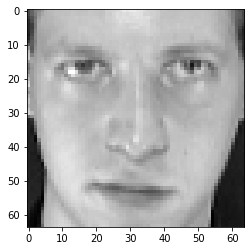

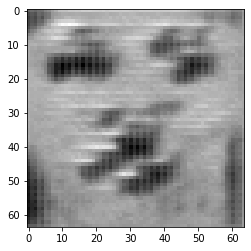

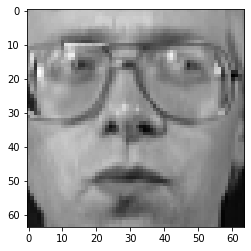

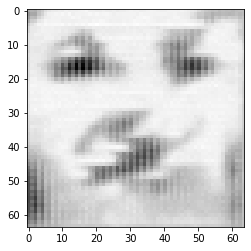

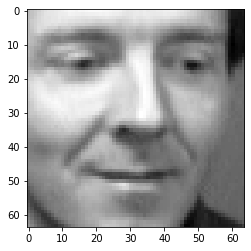

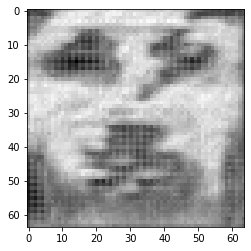

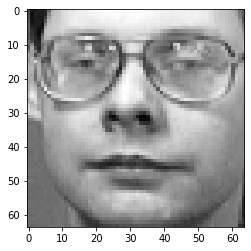

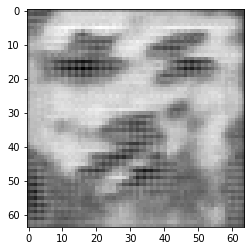

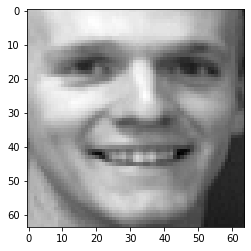

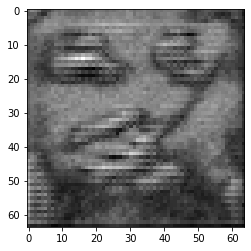

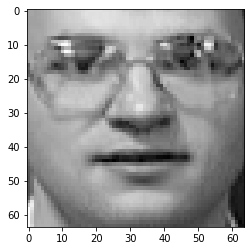

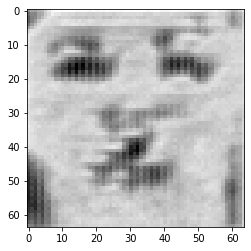

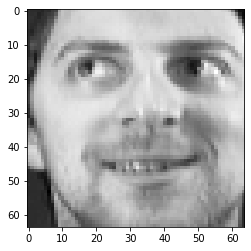

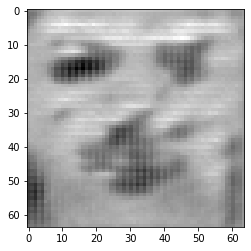

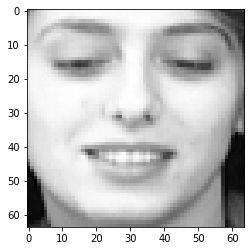

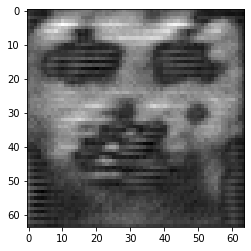

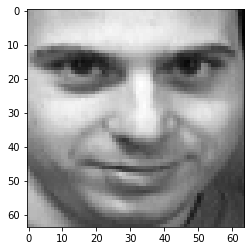

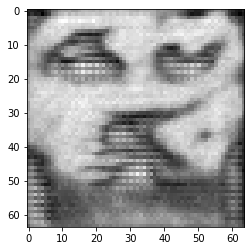

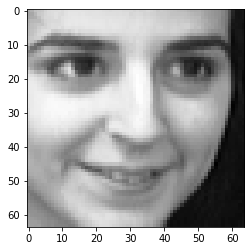

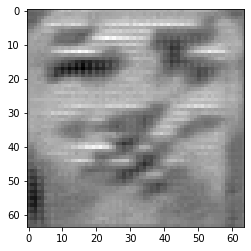

In [19]:
for i in range(10):
    label_to_picture(i)
    generated_image(i)

In [28]:
################

In [ ]:
#####################

In [20]:
torch.save(generator.state_dict(), 'generator_1e-8.pt')
torch.save(discriminator.state_dict(), 'discriminator_1e-8.pt')